# IMDB

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import pandas as pd
from pathlib import Path
from sklearn.metrics import classification_report

In [3]:
#ajustando os caminhos que serão utilizados

datapath = Path('../data')
modelspath = Path('../models')
path = Path('../')
best_model_path = Path('../models/bestmodel30k')

In [4]:
#Criar as pastas
!mkdir ../data/
!mkdir ../models
# Download dos dados
#!curl https://storage.googleapis.com/gde-dl-bsb/data/reclamacoes.csv -o ../data/reclamacoes.csv
# Download do modelo em portugues pretreinado na wikipedia
!curl https://storage.googleapis.com/gde-dl-bsb/models/bestmodel30k.pth -o ../models/bestmodel30k.pth
# Download do vocabulário
!curl https://storage.googleapis.com/gde-dl-bsb/models/itos.pkl -o ../models/itos.pkl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 52.2M  100 52.2M    0     0  44.3M      0  0:00:01  0:00:01 --:--:-- 44.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  411M  100  411M    0     0  41.9M      0  0:00:09  0:00:09 --:--:-- 57.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  516k  100  516k    0     0  4197k      0 --:--:-- --:--:-- --:--:-- 4197k


In [4]:
tweets = 'RNNdata/jairbolsonaro_tweets.txt'
def readnums(d): return [' '.join(o.strip() for o in open(d).readlines())]
#readnums(tweets)

In [5]:
t = readnums(tweets)
train_txt = valid_txt = []
train_txt.append(t[0][:360000])
valid_txt.append(t[0][360000:])


In [6]:
bs = 64
#path = 'RNNdata'

train = TextList(list(train_txt), path=path); print(type(train))
valid = TextList(list(valid_txt), path=path); print(type(valid_txt))

src = ItemLists(path=path, train=train, valid=valid).label_for_lm()
data = src.databunch(bs=bs)

In [7]:
#for i in range(80): print(train[i].text)
train[0].text[:80]

'xxbos xxmaj aguardando a xxmaj folha publicar algo a respeito . xxmaj obrigado x'

In [8]:
len(data.valid_ds[0][0].data)

78673

In [9]:
data.bptt, len(data.valid_dl)

(70, 18)

In [10]:
13017/70/bs

2.905580357142857

In [11]:
it = iter(data.valid_dl)
x1,y1 = next(it)
x2,y2 = next(it)
x3,y3 = next(it)
it.close()

In [12]:
x1.numel()+x2.numel()+x3.numel()

13440

In [13]:
data = src.databunch(bs=bs, bptt=3)

In [14]:
x,y = data.one_batch()
x.shape,y.shape

(torch.Size([64, 3]), torch.Size([64, 3]))

In [16]:
tokenizer = Tokenizer(lang='pt', n_cpus=8)
#vocabulario
with modelspath.joinpath('itos.pkl').open('rb') as f:
    itos = pickle.load(f)
vocab = Vocab(itos)


In [18]:
learn = language_model_learner(data, arch=AWD_LSTM, pretrained_fnames=(best_model_path,modelspath.joinpath('itos')))

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


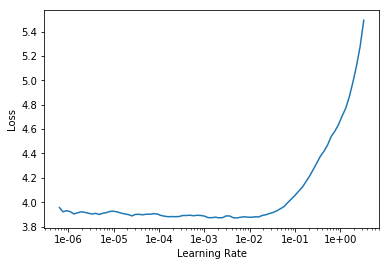

In [26]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(1, max_lr=5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.495907,3.724232,0.284642,00:08


In [22]:
learn.fit_one_cycle(5, max_lr=5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.369942,3.713896,0.277807,00:08
1,4.675898,3.997610,0.260543,00:08
2,4.588928,3.779630,0.274226,00:08
3,4.108640,3.427363,0.304896,00:08
4,3.844518,3.338719,0.315110,00:08


In [23]:
learn.fit_one_cycle(5, max_lr=5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.103928,3.561901,0.290254,00:08
1,4.673778,4.009729,0.252510,00:08
2,4.672981,3.841319,0.269837,00:08
3,4.299212,3.548083,0.293331,00:08
4,3.998785,3.457350,0.302966,00:08


In [35]:
TEXT = "Brasil acima de toods, Deus acima de tudo"
N_WORDS = 20
N_SENTENCES = 5

In [36]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Brasil acima de toods, Deus acima de tudo ! Deus acima de todos ! Nós temos a chance de mudar o Brasil ! Recebi
Brasil acima de toods, Deus acima de tudo ! Ainda há muito a fazer fazer ! Seguimos adiante ! Esse carinho ! Meus parabéns
Brasil acima de toods, Deus acima de tudo ! Nossa missão é expandir a troca de fogo e a garantia de um país . Jamais foi
Brasil acima de toods, Deus acima de tudo ! Vamos agir ! Brazil a Deus ! Vamos em frente ! Vamos juntos mudar
Brasil acima de toods, Deus acima de tudo e a população brasileira ! Estaremos kkkkk Que Deus continue a todos ! Estamos


In [39]:
TEXT = "A reforma da previdência"
N_WORDS = 50
N_SENTENCES = 5
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.50) for _ in range(N_SENTENCES)))

A reforma da previdência , em Brasília , Presidente , Ministros e Japão . Garantia de Brasília ! Vamos adiante ! Vamos adiante ! Um forte abraço , Santa Catarina . Um forte abraço a todos e até lá ! Vamos
A reforma da previdência : Esse carinho e a liberdade de cada um de nós , ou a liberdade de imprensa . Não há muito o que fazer ! Vamos juntos mudar o Brasil ! Vamos juntos mudar o Brasil ! Um forte abraço a todos !
A reforma da previdência ! Com a palavra a Folha de São Paulo , que vou aumentar imposto pra pobre , mas já que não existe apoio ! Estamos no mesmo barco e mesmo com menos de um mês de governo e nós temos tudo ! Vamos juntos
A reforma da previdência como a Folha de São Paulo e a Folha de São Paulo , além de garantir a Folha de SP , Folha de São Paulo . Boa noite a todos ! Obrigado pela confiança e consideração !
A reforma da previdência : Não há nada com os ministros , mas também , Deus acima de tudo ! Vamos adiante . Vamos juntos mudar o Brasil ! Obrigado Santa Catarina !

In [43]:
TEXT = "A esquerda"
N_WORDS = 50
N_SENTENCES = 5
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.50) for _ in range(N_SENTENCES)))

A esquerda , como se os Ministros e os ministros , sem segurança pública , ou como as sociais do Brasil . Nós somos esse projeto não pode parar ! Obrigado Rondonópolis ! Um forte abraço a todos ! Obrigado Belém ! Um
A esquerda , a população brasileira , que faz parte do INSS . Boa tarde a todos ! Um forte abraço a todos ! Parabéns a todos pela consideração ! Um forte abraço a todos ! Estamos no mesmo barco , mesmo com menos claro que
A esquerda , a esquerda age , mas sociedade , ou se eu mesmo . Estamos no mesmo barco , principalmente em meu governo ! 🇧 🇷 👍 🏻 Boa noite a todos ! 👍 🏻 Obrigado Salvador ! a Folha de SP não pode parar
A esquerda , na Câmara Federal , agora , agora , por favor do Ministério da Educação , na Câmara Federal . Força , Professor e Segurança Pública . Um forte abraço a todos ! Temos buscado nomes qualificados para
A esquerda , Presidente Eleito , em Brasília e Brasil ! Nos vemos lá ! Deus acima de todos ! Vamos juntos mudar o Brasil ! Obrigado pela homenagem ! V

In [41]:
learn.save('Bolsobot')

In [44]:
TEXT = "Grande dia"
N_WORDS = 50
N_SENTENCES = 5
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.50) for _ in range(N_SENTENCES)))

Grande dia , redução de impostos , aumento de 8 % , redução de impostos , investimentos , investimentos e segurança . Mais uma vez , em especial aos trilhos da Folha de São Paulo , além de garantir importantes . Vamos juntos mudar o Brasil
Grande dia : Não é uma facção criminosa para ser comandado de dentro da cadeia ! Vamos adiante ! Vamos juntos mudar o Brasil ! Quem não sou o Foro de SP . Esse é o Brasil . Um forte abraço !
Grande dia a todos ! Obrigado Belém . Obrigado Belém ! Juntos , em Brasília , em Curitiba , General Mourão , em Goiás , Paraíba , Ceará , Chile , Chile . Temos buscado independência para
Grande dia ! Os que querem a cada um de nós que o Brasil volte . FHC mesmo para ser comandado de um povo . Estamos no mesmo barco e mesmo para ser o Brasil . Brasil acima de tudo ! Um forte abraço a
Grande dia ! Um forte abraço a todos ! Boa noite a todos ! Vamos mudar o Brasil ! Sábado : Os estudos estão nas ruas de Brasília , Estados Unidos , Japão , Sul , Japão , Chile


In [47]:
TEXT = "Kit gay"
N_WORDS = 50
N_SENTENCES = 5
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.80) for _ in range(N_SENTENCES)))

Kit gay e internet ! a mentira é uma das principais principais mentiras que a população fica possa ser um dos mais importantes da história . Das Forças Armadas e Lava - Jato . Nosso país não tenho obsessão pela responsabilidade , que é de hoje
Kit gay e internet que o apoio é tanto com a população . Estamos mostrando o que era muitos filhos do Brasil . Boa noite a todos ! Nossa missão é fazer diferente com a verdade , além de fazer a Lava Jato sobre o que
Kit gay para o Brasil e o povo até o fim de 2019 , hoje há quase 8 anos para se transformar em países de crianças ! Brasil acima de tudo , propriedade privada , aeroportos , ferrovias e corrupção ) . Um forte abraço , todos queremos !
Kit gay , Gestão , FAMÍLIA , Sul e Estados Unidos , Marina Silva , Suíça , Chile , MT e MP POR CORRUPÇÃO ) ! Por isso tentam o que foi para participar de um Brasil
Kit gay em parceria com poucos startups ! Nossa é a diferença , o mesmo de outros órgãos do governo . - Pela manhã , sou presidente . Essa é 